# Building a Neural Network with TensorFlow

## Everything you need to know about models
- tf.keras.models
  1. compile()
  2. evaluate()
  3. fit()
  4. predict()
  5. save_model()
  6. load_model()

## Basic Components an Neural network model:
- Layers: Building blocks of neural networks, such as dense, convolutional, and recurrent layers.
  - Dense(128, activation='relu', input_shape=(784,))
  - Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))
  - LSTM(64, return_sequences=True, input_shape=(100, 50))
  - BatchNormalization()
  - Dropout(0.2)
  - Embedding(10000, 64, input_length=100)
  - MaxPooling2D(pool_size=(2, 2))
- Activation Functions: Introduce non-linearity, like ReLU, sigmoid, and tanh.
  - tf.keras.activations
    1. relu()
    2. sigmoid()
    3. softmax()
    4. tanh()
- Loss Function: Measures the model's prediction error.
  - tf.keras.losses
    - BinaryCrossentropy
    - CategoricalCrossentropy
    - MeanSquaredError
- Optimizer: Adjusts model parameters to minimize loss.
  - tf.keras.optimizers
    - Adam
    - RMSprop
    - SGD

In [1]:
# Synthetic Data generation
# y = sin(x)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

x_deg = np.linspace(0, 180, 200)
x_rad = np.radians(x_deg)
y = np.sin(x_rad)
y_true = y.copy()
noise = np.random.normal(0, 0.1, size=x_rad.shape)  # Gaussian noise (std=0.1)
y = (y + noise).reshape(-1, 1).astype(np.float32)

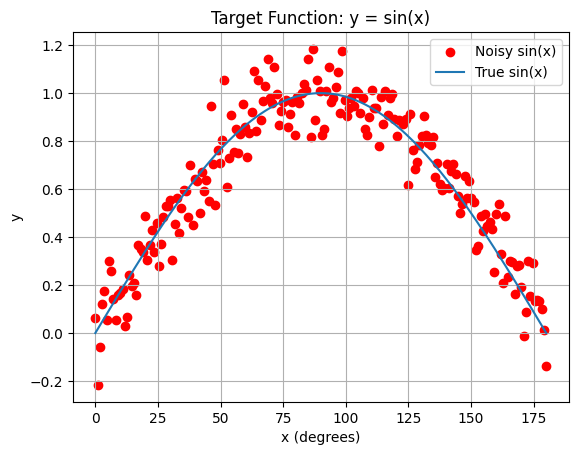

In [2]:
# Normalize input
x = x_rad.reshape(-1, 1).astype(np.float32)
y = y.reshape(-1, 1).astype(np.float32)

# Visualize original data
plt.scatter(x_deg, y, label="Noisy sin(x)",color='red')
plt.plot(x_deg, y_true, label="True sin(x)")
plt.title("Target Function: y = sin(x)")
plt.xlabel("x (degrees)")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

# Single Neuron

c:\Users\suraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


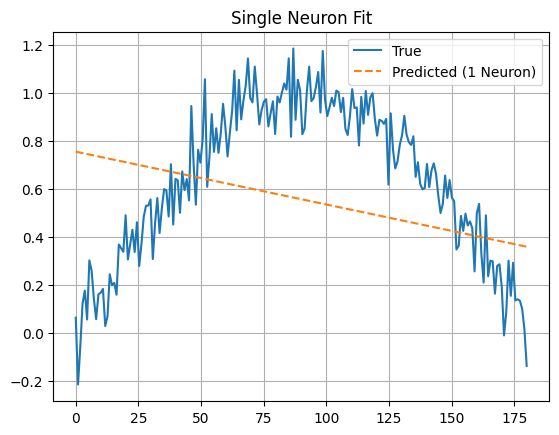

In [3]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

model1.compile(optimizer='adam', loss='mse')
model1.fit(x, y, epochs=200, verbose=0)

y_pred1 = model1.predict(x)

plt.plot(x_deg, y, label='True')
plt.plot(x_deg, y_pred1, label='Predicted (1 Neuron)', linestyle='--')
plt.title("Single Neuron Fit")
plt.legend()
plt.grid(True)
plt.show()

## Shallow Network

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


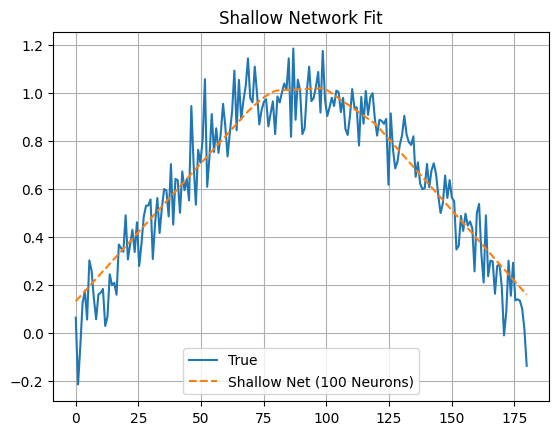

In [4]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model2.compile(optimizer='adam', loss='mse')
model2.fit(x, y, epochs=200, verbose=0)

y_pred2 = model2.predict(x)

plt.plot(x_deg, y, label='True')
plt.plot(x_deg, y_pred2, label='Shallow Net (100 Neurons)', linestyle='--')
plt.title("Shallow Network Fit")
plt.legend()
plt.grid(True)
plt.show()

# Deep Neural Network

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


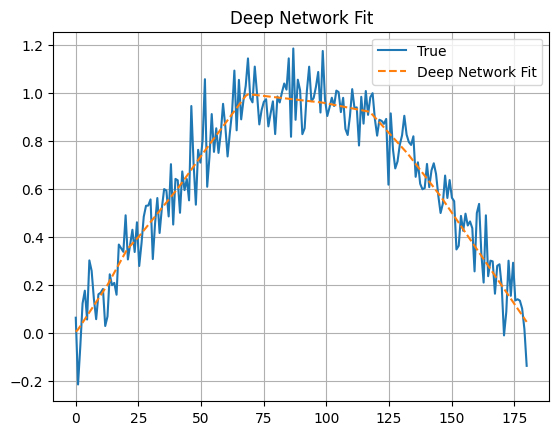

In [5]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model3.compile(optimizer='adam', loss='mse')
model3.fit(x, y, epochs=300, verbose=0)

y_pred3 = model3.predict(x)

plt.plot(x_deg, y, label='True')
plt.plot(x_deg, y_pred3, label='Deep Network Fit', linestyle='--')
plt.title("Deep Network Fit")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
loss1 = model1.evaluate(x, y, verbose=0)
loss2 = model2.evaluate(x, y, verbose=0)
loss3 = model3.evaluate(x, y, verbose=0)

print(f"Loss (1 Neuron): {loss1:.5f}")
print(f"Loss (Shallow NN): {loss2:.5f}")
print(f"Loss (Deep NN): {loss3:.5f}")

Loss (1 Neuron): 0.12631
Loss (Shallow NN): 0.01081
Loss (Deep NN): 0.00867


## Exercise 1
Approximating a function using shallow and deep neural networks


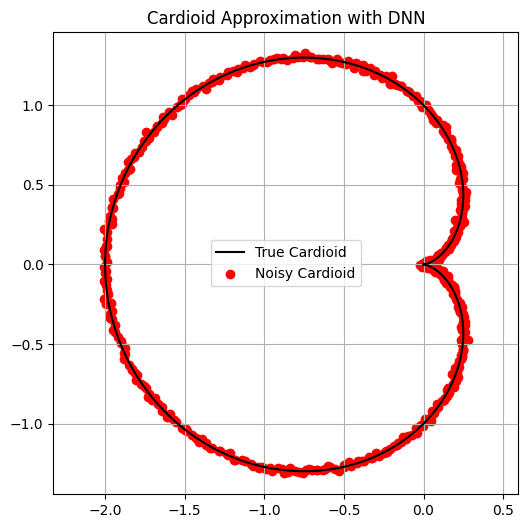

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime

theta = np.linspace(0, 2 * np.pi, 500).astype(np.float32)
r = 1 - np.cos(theta)
x = r * np.cos(theta)
y = r * np.sin(theta)

theta_input = theta.reshape(-1, 1)
xy_output = np.stack([x, y], axis=1)
xy_output += np.random.normal(0, 0.01, size=xy_output.shape)


# Synthetic data
plt.figure(figsize=(6, 6))
plt.plot(x, y, label='True Cardioid', color='black')
plt.scatter(xy_output[:, 0], xy_output[:, 1], label='Noisy Cardioid', color='red')
plt.axis('equal')
plt.title("Cardioid Approximation with DNN")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Define a model named CARD - (DNN), with just 5 layers to approximate the above function
# Prepare data
theta_input = tf.constant(theta.reshape(-1, 1), dtype=tf.float32)  # Shape (500, 1)
xy_output = tf.constant(xy_output, dtype=tf.float32)               # Shape (500, 2)

# Define the CARD model
CARD = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)  # Output layer (x, y), no activation
])

# Compile model
CARD.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='mse')

# TensorBoard logging (optional)
log_dir = "logs/cardioid_fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
history = CARD.fit(theta_input, xy_output, epochs=300, verbose=0, callbacks=[tensorboard_callback])


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


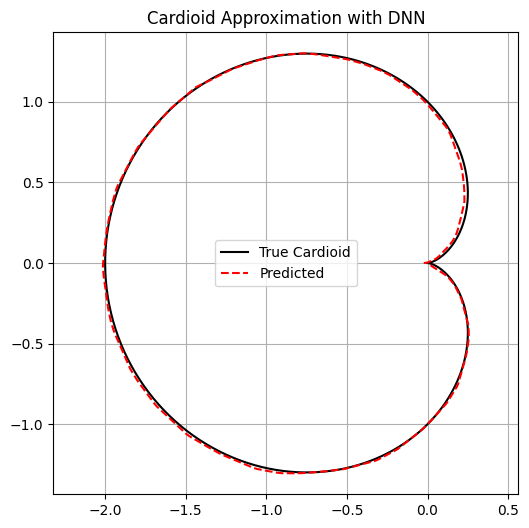

In [9]:
# Predict and plot
pred_xy = CARD.predict(theta_input)

plt.figure(figsize=(6, 6))
plt.plot(x, y, label='True Cardioid', color='black')
plt.plot(pred_xy[:, 0], pred_xy[:, 1], label='Predicted', linestyle='--', color='red')
plt.axis('equal')
plt.title("Cardioid Approximation with DNN")
plt.legend()
plt.grid(True)
plt.show()

## Experiment 2
- Plot the loss of the approximation from $y=\cos(x)$ function from 45 to 215 degres. Figure out how to stop the training after no change in loss after 5 epochs. Shallow network increase the width from 1 to 200.
- Fix total number of neuron, change the depth of the network and plot the loss function.

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Data Prep
x_deg = np.linspace(45, 215, 300).astype(np.float32)
x_rad = np.deg2rad(x_deg).reshape(-1, 1)
y = np.cos(x_rad)

x_train = tf.constant(x_rad)
y_train = tf.constant(y.reshape(-1, 1))

# Early Stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='loss', patience=5, restore_best_weights=True)

In [11]:
widths = range(1, 201, 10)  # Widths: 1 to 200 (step 10)
losses_width = []

for width in widths:
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        tf.keras.layers.Dense(width, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    
    history = model.fit(x_train, y_train, epochs=300, verbose=0,
                        callbacks=[early_stop])
    
    losses_width.append(history.history['loss'][-1])


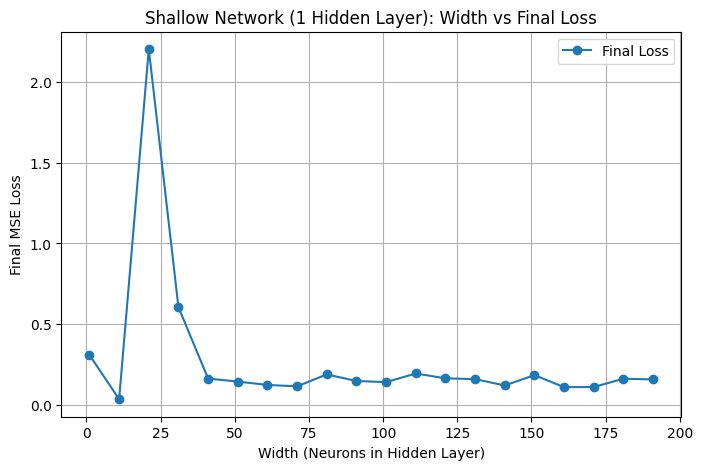

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(widths, losses_width, marker='o', label='Final Loss')
plt.title("Shallow Network (1 Hidden Layer): Width vs Final Loss")
plt.xlabel("Width (Neurons in Hidden Layer)")
plt.ylabel("Final MSE Loss")
plt.grid(True)
plt.legend()
plt.show()


In [13]:
total_neurons = 200
max_depth = 10
losses_depth = []

for depth in range(1, max_depth + 1):
    neurons_per_layer = max(1, total_neurons // depth)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(1,)))
    for _ in range(depth):
        model.add(tf.keras.layers.Dense(neurons_per_layer, activation='relu'))
    model.add(tf.keras.layers.Dense(1))  # Output

    model.compile(optimizer='adam', loss='mse')

    history = model.fit(x_train, y_train, epochs=300, verbose=0,
                        callbacks=[early_stop])

    losses_depth.append(history.history['loss'][-1])


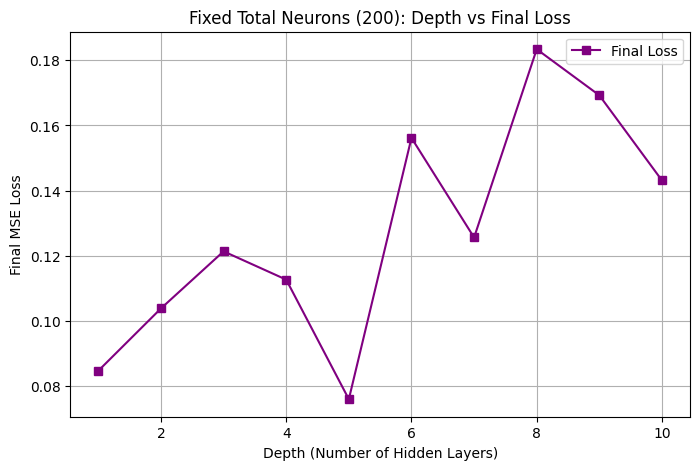

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_depth + 1), losses_depth, marker='s', color='purple', label='Final Loss')
plt.title("Fixed Total Neurons (200): Depth vs Final Loss")
plt.xlabel("Depth (Number of Hidden Layers)")
plt.ylabel("Final MSE Loss")
plt.grid(True)
plt.legend()
plt.show()
